# Predicting Formula 1 Tracks only by car behavior (telemetry)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
import pickle

In [2]:
df = pd.read_csv('formula.csv')
df

,Throttle_1,Throttle_2,Throttle_3,nGear_1,nGear_2,nGear_3,Track
0,90.157480,72.360656,62.953237,6.354331,5.478689,4.446043,Abu Dhabi
1,89.914062,70.226230,59.756272,6.398438,5.449180,4.422939,Abu Dhabi
2,90.609375,69.167763,58.074733,6.476562,5.453947,4.562278,Abu Dhabi
3,89.072000,69.993399,60.731449,6.544000,5.673267,4.706714,Abu Dhabi
4,89.184000,70.201987,59.616197,6.376000,5.566225,4.690141,Abu Dhabi
...,...,...,...,...,...,...,...
3057,75.313514,63.016667,58.741935,6.632432,5.258333,5.129032,Spain
3058,79.562130,65.504132,61.538889,6.360947,5.008264,4.683333,Spain
3059,79.500000,63.058824,62.762431,6.623596,5.046218,5.171271,Spain
3060,81.271676,66.263374,60.755319,6.624277,5.061728,4.984043,Spain


* The "Throttle" feature are the average percentage of the throttle across the sector

* The "nGear" feature are the average gear number across the sector

* __Getting only these features, can we predict which circuit is that lap from?__

In [3]:
def plot_conf_matrix(conf_matrix):
    sns.heatmap(conf_matrix,
                annot=True,
                fmt='.0f',
                annot_kws={'fontsize': 10, 'fontweight': 'bold'},
                cmap='magma',
                xticklabels=['Abu Dhabi', 'Austin', 'Australia', 'Austria', 'Bahrain', 'Baku', 'Brazil', 'Canada', 'France',
                             'Hungary', 'Japan', 'Mexico', 'Monaco', 'Monza', 'Saudi Arabia', 'Silverstone', 'Spa-Francorchamps', 'Spain'],
                yticklabels=['Abu Dhabi', 'Austin', 'Australia', 'Austria', 'Bahrain', 'Baku', 'Brazil', 'Canada', 'France',
                             'Hungary', 'Japan', 'Mexico', 'Monaco', 'Monza', 'Saudi Arabia', 'Silverstone', 'Spa-Francorchamps', 'Spain'])
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Real', fontsize=14)
    plt.yticks(rotation=0);


In [4]:
X = df.drop('Track', axis=1)
y = df['Track']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(2449, 6)
(613, 6)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(f'Ein: {1 - dt_model.score(X_train, y_train):.4f}')
print(f'Eout: {1 - dt_model.score(X_test, y_test):.4f}')
print(classification_report(y_test, dt_model.predict(X_test)))

Ein: 0.0000
Eout: 0.0718
                   precision    recall  f1-score   support

        Abu Dhabi       0.89      0.94      0.91        33
           Austin       0.92      0.87      0.89        39
        Australia       0.91      0.91      0.91        34
          Austria       0.90      0.83      0.86        42
          Bahrain       0.95      1.00      0.98        40
             Baku       0.97      1.00      0.99        37
           Brazil       1.00      0.97      0.98        29
           Canada       0.86      0.95      0.90        20
           France       0.94      1.00      0.97        34
          Hungary       0.83      0.94      0.88        31
            Japan       0.85      0.74      0.79        23
           Mexico       1.00      1.00      1.00        33
           Monaco       1.00      0.97      0.98        33
            Monza       1.00      0.97      0.99        39
     Saudi Arabia       0.90      1.00      0.95        19
      Silverstone       0.88  

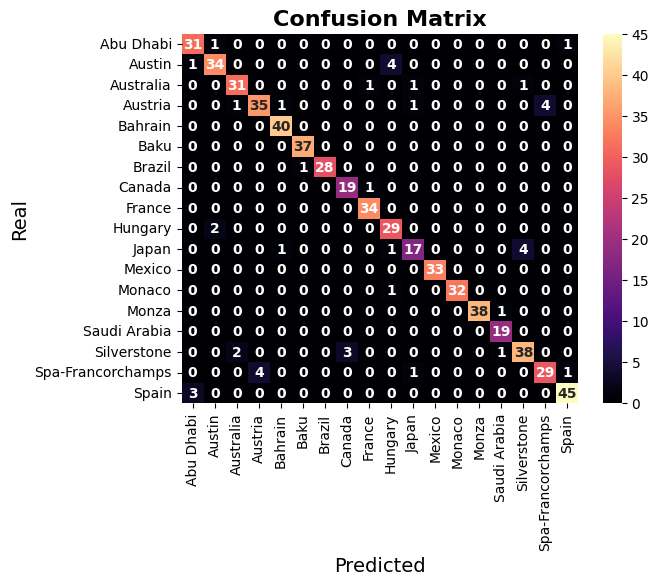

In [ ]:
plot_conf_matrix(confusion_matrix(y_test, dt_model.predict(X_test)))

In [ ]:
plt.figure(figsize=(85,35))
plot_tree(
    dt_model,
    filled=True,
    proportion = True,
    fontsize=10,
    rounded = True,
    feature_names=X.columns);

Output hidden; open in https://colab.research.google.com to view.

As we have 18 different tracks, the tree needs a lot of branches to classify efficiently. Even without any regularization, the Decision Tree already got 93% accuracy, which is pretty good.

Now, let's try to regularize the tree in order to get a better accuracy.

In [ ]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00038281, 0.00039058, 0.00039809, 0.00039837,
       0.00040038, 0.00040129, 0.00040241, 0.00040296, 0.0004044 ,
       0.00040516, 0.00040581, 0.00040833, 0.00040833, 0.00040833,
       0.00040833, 0.00040833, 0.00040833, 0.00040833, 0.00040833,
       0.00040833, 0.00040833, 0.00040833, 0.00040833, 0.00054444,
       0.00054444, 0.00054444, 0.00054444, 0.00054444, 0.00054444,
       0.00054444, 0.00054444, 0.00061249, 0.00061249, 0.00061249,
       0.00061249, 0.00061249, 0.00061249, 0.00061249, 0.00061249,
       0.00065333, 0.00065333, 0.00068055, 0.00071458, 0.00071458,
       0.00072358, 0.00072592, 0.00073499, 0.00074242, 0.0007486 ,
       0.00075219, 0.0007588 , 0.00076222, 0.00077358, 0.00077537,
       0.00077777, 0.00078256, 0.00078263, 0.0007885 , 0.00079358,
       0.00079559, 0.00079902, 0.00079928, 0.00080424, 0.0008093 ,
       0.00081066, 0.00087499, 0.00088253, 0.00096249, 0.00097999,
       0.00100226, 0.00104351, 0.00108888, 0.00108888, 0.00109

In [ ]:
%%time
new_dt_model = DecisionTreeClassifier(random_state=42)
path = new_dt_model.cost_complexity_pruning_path(X_train, y_train)

params = {'ccp_alpha': ccp_alphas}

DT_grid = GridSearchCV(new_dt_model, params, cv=7, verbose=3)

DT_grid.fit(X_train, y_train)
print(f"\n{DT_grid.best_params_}")

Fitting 7 folds for each of 155 candidates, totalling 1085 fits
[CV 1/7] END .....................ccp_alpha=0.0;, score=0.940 total time=   0.0s
[CV 2/7] END .....................ccp_alpha=0.0;, score=0.897 total time=   0.0s
[CV 3/7] END .....................ccp_alpha=0.0;, score=0.926 total time=   0.0s
[CV 4/7] END .....................ccp_alpha=0.0;, score=0.929 total time=   0.0s
[CV 5/7] END .....................ccp_alpha=0.0;, score=0.894 total time=   0.0s
[CV 6/7] END .....................ccp_alpha=0.0;, score=0.920 total time=   0.0s
[CV 7/7] END .....................ccp_alpha=0.0;, score=0.931 total time=   0.0s
[CV 1/7] END ..ccp_alpha=0.00038280930992241733;, score=0.940 total time=   0.0s
[CV 2/7] END ..ccp_alpha=0.00038280930992241733;, score=0.897 total time=   0.0s
[CV 3/7] END ..ccp_alpha=0.00038280930992241733;, score=0.926 total time=   0.0s
[CV 4/7] END ..ccp_alpha=0.00038280930992241733;, score=0.929 total time=   0.0s
[CV 5/7] END ..ccp_alpha=0.000382809309922417

In [ ]:
pd.DataFrame(DT_grid.cv_results_).sort_values(by='rank_test_score')[['param_ccp_alpha',
                                                                     'params',
                                                                     'mean_test_score',
                                                                     'rank_test_score']].head(10)

,param_ccp_alpha,params,mean_test_score,rank_test_score
0,0.0,{'ccp_alpha': 0.0},0.919564,1
1,0.000383,{'ccp_alpha': 0.00038280930992241733},0.919564,1
2,0.000391,{'ccp_alpha': 0.00039057645534113313},0.919564,1
23,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
22,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
21,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
20,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
19,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
18,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4
17,0.000408,{'ccp_alpha': 0.0004083299305839118},0.919156,4


The best alpha was 0.0, so the regularization didn't help much. and the best accuracy was 93% for Decision Tree, that is pretty good.

## SVM

In [7]:
from sklearn.svm import SVC

Now, let's try to use SVM to classify the tracks, starting with the RBF kernel, without any regularization.

### RBF

In [8]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [9]:
print(f'Ein: {1 - svm_model.score(X_train, y_train):.4f}')
print(f'Eout: {1 - svm_model.score(X_test, y_test):.4f}')
print(classification_report(y_test, svm_model.predict(X_test), zero_division=1))

Ein: 0.2470
Eout: 0.2316
                   precision    recall  f1-score   support

        Abu Dhabi       0.00      0.00      0.00        33
           Austin       0.66      0.74      0.70        39
        Australia       1.00      0.53      0.69        34
          Austria       0.62      0.81      0.70        42
          Bahrain       0.73      0.95      0.83        40
             Baku       1.00      1.00      1.00        37
           Brazil       1.00      1.00      1.00        29
           Canada       1.00      0.95      0.97        20
           France       0.94      1.00      0.97        34
          Hungary       0.69      0.77      0.73        31
            Japan       1.00      0.00      0.00        23
           Mexico       0.89      1.00      0.94        33
           Monaco       0.89      1.00      0.94        33
            Monza       0.97      0.92      0.95        39
     Saudi Arabia       0.76      1.00      0.86        19
      Silverstone       0.57  

The kernel RBF without regularization doesn't have bad accuracy, but with regularization, probably will improve.

So let's regularize, using GridSearchCV

In [10]:
%%time
param_grid = {
              'gamma': [
                  .00001, .000025, .00005, .000075,
                  .0001, .00025, .0005, .00075,
                  .001, .0025, .005, .0075,
                  .01, .025, .05, .075,
                  .1, .25, .5, .75
                  ],
              'C': list(range(2, 31, 4))
              }

svm_grid_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=7, verbose=3)
svm_grid_rbf.fit(X_train, y_train)
print(svm_grid_rbf.best_params_)

Fitting 7 folds for each of 160 candidates, totalling 1120 fits
[CV 1/7] END ..................C=2, gamma=1e-05;, score=0.451 total time=   0.3s
[CV 2/7] END ..................C=2, gamma=1e-05;, score=0.457 total time=   0.3s
[CV 3/7] END ..................C=2, gamma=1e-05;, score=0.463 total time=   0.3s
[CV 4/7] END ..................C=2, gamma=1e-05;, score=0.454 total time=   0.3s
[CV 5/7] END ..................C=2, gamma=1e-05;, score=0.443 total time=   0.3s
[CV 6/7] END ..................C=2, gamma=1e-05;, score=0.454 total time=   0.3s
[CV 7/7] END ..................C=2, gamma=1e-05;, score=0.461 total time=   0.3s
[CV 1/7] END ................C=2, gamma=2.5e-05;, score=0.634 total time=   0.2s
[CV 2/7] END ................C=2, gamma=2.5e-05;, score=0.606 total time=   0.2s
[CV 3/7] END ................C=2, gamma=2.5e-05;, score=0.631 total time=   0.3s
[CV 4/7] END ................C=2, gamma=2.5e-05;, score=0.637 total time=   0.2s
[CV 5/7] END ................C=2, gamma=2.5e-

In [11]:
pd.DataFrame(svm_grid_rbf.cv_results_).sort_values(by='rank_test_score')[['param_C',
                                                                      'param_gamma',
                                                                      'params',
                                                                      'mean_test_score',
                                                                      'rank_test_score']].head(5)

,param_C,param_gamma,params,mean_test_score,rank_test_score
151,30,0.0075,"{'C': 30, 'gamma': 0.0075}",0.955496,1
152,30,0.01,"{'C': 30, 'gamma': 0.01}",0.953864,2
131,26,0.0075,"{'C': 26, 'gamma': 0.0075}",0.953047,3
132,26,0.01,"{'C': 26, 'gamma': 0.01}",0.952638,4
150,30,0.005,"{'C': 30, 'gamma': 0.005}",0.951413,5


In [12]:
print(f'Ein: {1 - svm_grid_rbf.score(X_train, y_train):.4f}')
print(f'Eout: {1 - svm_grid_rbf.score(X_test, y_test):.4f}')
print(classification_report(y_test, svm_grid_rbf.predict(X_test)))

Ein: 0.0159
Eout: 0.0375
                   precision    recall  f1-score   support

        Abu Dhabi       0.94      0.97      0.96        33
           Austin       0.87      1.00      0.93        39
        Australia       0.94      0.97      0.96        34
          Austria       0.94      0.81      0.87        42
          Bahrain       0.98      1.00      0.99        40
             Baku       1.00      1.00      1.00        37
           Brazil       1.00      1.00      1.00        29
           Canada       1.00      1.00      1.00        20
           France       1.00      1.00      1.00        34
          Hungary       0.97      0.97      0.97        31
            Japan       0.88      0.91      0.89        23
           Mexico       0.97      1.00      0.99        33
           Monaco       1.00      1.00      1.00        33
            Monza       1.00      0.97      0.99        39
     Saudi Arabia       1.00      1.00      1.00        19
      Silverstone       1.00  

With validation the best parameters are "C": 30 and "gamma": 0.0075, and the accuracy was 77% and now is 96%, a big improvement

Let's continue with SVM, but let's change the kernel to linear, to see if there is any linearity between the classes(tracks).

### LINEAR

In [24]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
print(f'Ein: {1 - svm_model.score(X_train, y_train):.4f}')
print(f'Eout: {1 - svm_model.score(X_test, y_test):.4f}')
print(classification_report(y_test, svm_model.predict(X_test), zero_division=1))

Ein: 0.0294
Eout: 0.0294
                   precision    recall  f1-score   support

        Abu Dhabi       0.94      0.97      0.96        33
           Austin       0.95      0.95      0.95        39
        Australia       0.97      0.97      0.97        34
          Austria       0.93      0.88      0.90        42
          Bahrain       0.98      1.00      0.99        40
             Baku       1.00      1.00      1.00        37
           Brazil       1.00      1.00      1.00        29
           Canada       1.00      1.00      1.00        20
           France       1.00      1.00      1.00        34
          Hungary       0.94      0.97      0.95        31
            Japan       0.88      0.96      0.92        23
           Mexico       1.00      1.00      1.00        33
           Monaco       1.00      1.00      1.00        33
            Monza       1.00      1.00      1.00        39
     Saudi Arabia       0.90      1.00      0.95        19
      Silverstone       1.00  

The Linear kernel in theory is the weakest because it waits for the linearity in data, that is easy to split, so let's dig in it.

Let's use Linear Regression and Logistic Regression as classifiers

In [26]:
import sklearn.multiclass as skm
from sklearn.linear_model import LinearRegression, LogisticRegression

### Linear Regression

We are going to use the strategy of OneVsRest to classify the tracks using Linear Regression

In [27]:
linear_model = skm.OneVsRestClassifier(LinearRegression())

In [28]:
linear_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearRegression())

In [29]:
print(f'Ein: {1 - linear_model.score(X_train, y_train):.4f}')
print(f'Eout: {1 - linear_model.score(X_test, y_test):.4f}')
print(classification_report(y_test, linear_model.predict(X_test)))

Ein: 0.3365
Eout: 0.3083
                   precision    recall  f1-score   support

        Abu Dhabi       0.57      0.97      0.72        33
           Austin       0.89      0.21      0.33        39
        Australia       0.76      0.65      0.70        34
          Austria       0.80      0.67      0.73        42
          Bahrain       1.00      0.03      0.05        40
             Baku       0.54      1.00      0.70        37
           Brazil       0.90      0.93      0.92        29
           Canada       1.00      0.75      0.86        20
           France       0.61      1.00      0.76        34
          Hungary       0.70      0.45      0.55        31
            Japan       0.00      0.00      0.00        23
           Mexico       0.89      0.73      0.80        33
           Monaco       0.60      1.00      0.75        33
            Monza       0.75      0.97      0.84        39
     Saudi Arabia       0.00      0.00      0.00        19
      Silverstone       0.67  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It wasn't good, let's test the Logistic Regression

### Logistic Regression

In [30]:
log_model = LogisticRegression(max_iter=int(7.5e3))

In [31]:
log_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=7500)

In [32]:
print(f'Ein: {1 - log_model.score(X_train, y_train):.4f}')
print(f'Eout: {1 - log_model.score(X_test, y_test):.4f}')
print(classification_report(y_test, log_model.predict(X_test)))

Ein: 0.0416
Eout: 0.0408
                   precision    recall  f1-score   support

        Abu Dhabi       0.94      0.97      0.96        33
           Austin       0.90      0.95      0.92        39
        Australia       0.97      0.97      0.97        34
          Austria       0.90      0.83      0.86        42
          Bahrain       0.95      1.00      0.98        40
             Baku       1.00      1.00      1.00        37
           Brazil       1.00      1.00      1.00        29
           Canada       1.00      1.00      1.00        20
           France       0.97      1.00      0.99        34
          Hungary       0.90      0.90      0.90        31
            Japan       0.83      0.83      0.83        23
           Mexico       1.00      1.00      1.00        33
           Monaco       1.00      1.00      1.00        33
            Monza       1.00      1.00      1.00        39
     Saudi Arabia       1.00      1.00      1.00        19
      Silverstone       1.00  

As we obtained 96% accuracy, we can confirm that there is a certain linearity in the separation of the data, which means that the problem is easy to classify.

## Conclusion

It is interesting to see that even with completely different lengths, straights and curves, seeing only the average throttle percentage and the average gear __per sector__, we can easily understand which track is.